In [1]:
from fasta import *

# Load data

In [2]:
df_all = load_data(n_rows=1000)

In [3]:
features = ['length', 'number_exons', 'length_from_pos', 'number_introns', 'mean_exon_length', 'ratio_g', 'ratio_a', 'ratio_c', 'ratio_t']

# Create pair plot for all features

In [10]:
pair(df_all, features)

KeyError: "['length_from_pos', 'number_introns', 'length'] not in index"

# Run all cluster algorithms and save to output dir

In [ ]:
features = ['length', 'number_exons', 'length_from_pos', 'number_introns', 'mean_exon_length', 'ratio_g', 'ratio_a', 'ratio_c', 'ratio_t', 'chromosoms_label']
run_all_clustering(df, features)

# Ausreiser ?

In [4]:
df_all = df_all[df_all['length'] < 15]
features = ['length', 'number_exons', 'length_from_pos', 'number_introns', 'mean_exon_length', 'ratio_g', 'ratio_a', 'ratio_c', 'ratio_t', 'chromosom']
#(df_all, features)

# Findings

## Length

### Optimize K-Means - Find optimal number of clusters

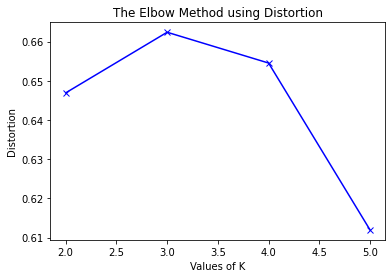

In [20]:
df = df_all[['length']]
k = [2, 3, 4, 5]
best_k, scores = find_best_number_clusters(df, k)
plot_elbow(k, scores)

NameError: name 'output_path' is not defined

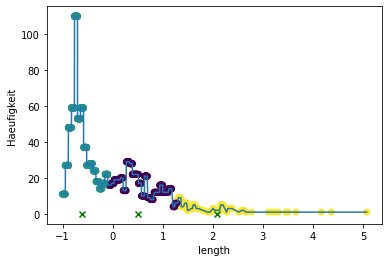

In [21]:
run_kmeans(df, 3)

### Optimize DBSCAN - Find optimal epsilon

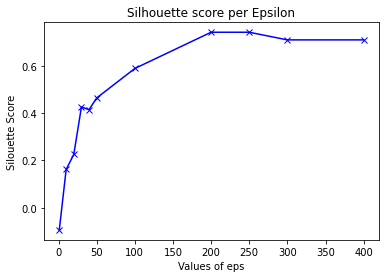

In [7]:
find_best_eps(df, [1, 10, 20, 30, 40, 50, 100, 200, 250, 300, 400])

In [4]:
run_dbscan(df, 200)

Series([], Name: length, dtype: int64)


IndexError: single positional indexer is out-of-bounds

## Playgorund

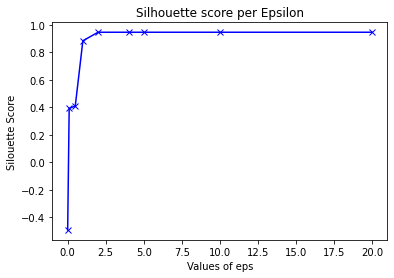

In [6]:
df = df_all[['number_introns', 'number_exons']]
find_best_eps(df)

In [ ]:
run_dbscan(df, 40)

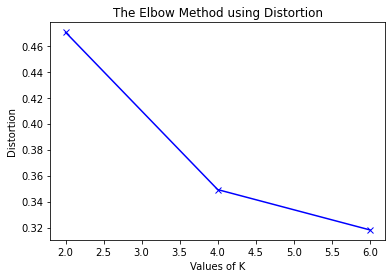

In [16]:
df = df_all[['number_exons', 'length_from_pos', 'ratio_t']]
k = [2, 4, 6]
best_k, scores = find_best_number_clusters(df, k)
plot_elbow(k, scores)

NameError: name 'output_path' is not defined

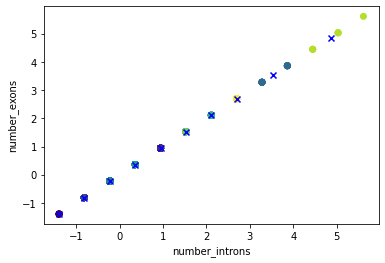

In [10]:
run_kmeans(df, 10)

In [5]:
def get_best_combinations(combination_length, threshold=0.5):
    import itertools
    combinations_silouette_over_threshold = []
    for combination in itertools.combinations(features, combination_length):
        df = df_all[list(combination)]
        best_k, scores = find_best_number_clusters(df, [2,3,4,5,6])
        best_score = max(scores)
        if best_score > threshold:
            combinations_silouette_over_threshold.append([best_k, best_score, combination])

    return combinations_silouette_over_threshold

In [6]:
def plot_best_combinations(dimension, combinations, threshold):
    fig = plt.figure(figsize=(15,15))
    fig.suptitle('Cluster mit Silouette Score > %s' % threshold, fontsize=20)
    from mpl_toolkits.mplot3d import Axes3D
    grid_size = 0
    number_plots = len(combinations)
    if number_plots <= 9:
        grid_size = 3
    elif number_plots <= 16:
        grid_size = 4

    for i, useful_combination in enumerate(combinations):
        projection = '3d' if dimension == 3 else 'rectilinear'
        
        df = df_all[list(useful_combination[2])]
        best_k = useful_combination[0]
        best_score = useful_combination[1]
        model, centroids, labels = fit_kmeans(df, best_k)
        ax = fig.add_subplot('%s%s%s' % (grid_size, grid_size, i),projection=projection)
        ax.title.set_text('#Clusters: %s, Score: %s' % (best_k, best_score))
        if dimension == 1:
            plot_kmeans_1d(centroids, df, best_k, model, ax)
        elif dimension == 2:
            plot_kmeans_2d(centroids, df, best_k, model, ax)
        else:
            plot_kmeans_3d(model, df, ax)
        
    plt.show()



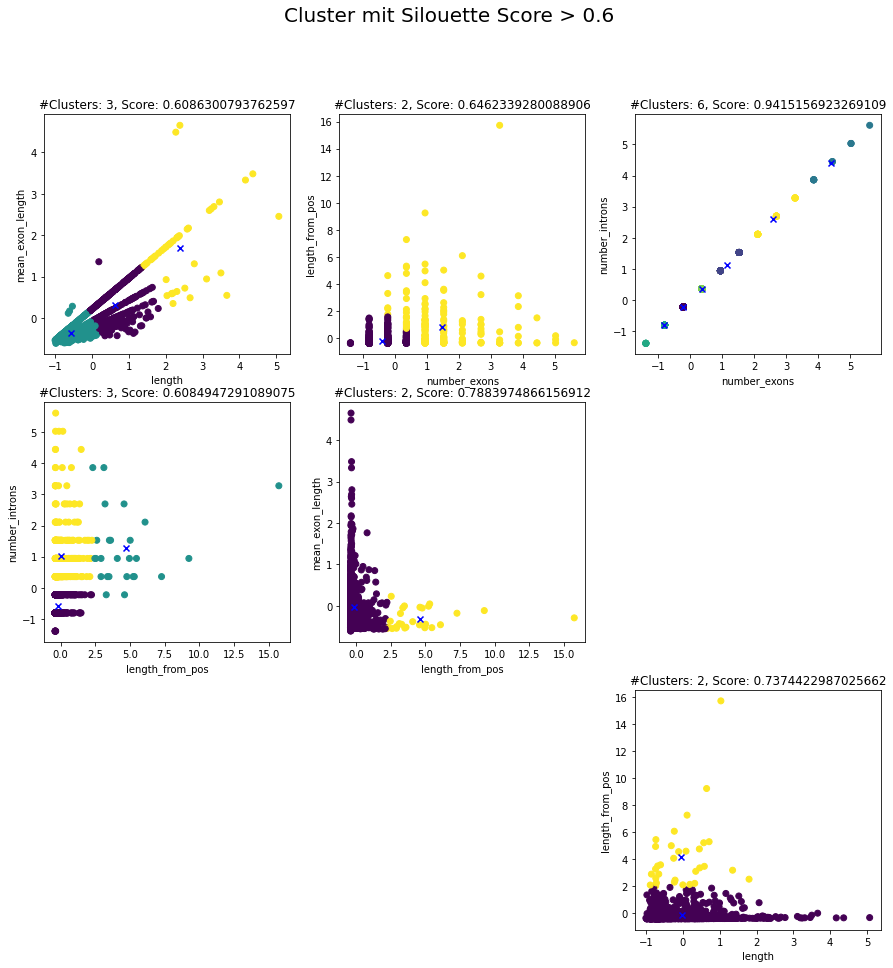

In [7]:
combinations = get_best_combinations(2, 0.6)
plot_best_combinations(2, combinations, 0.6)

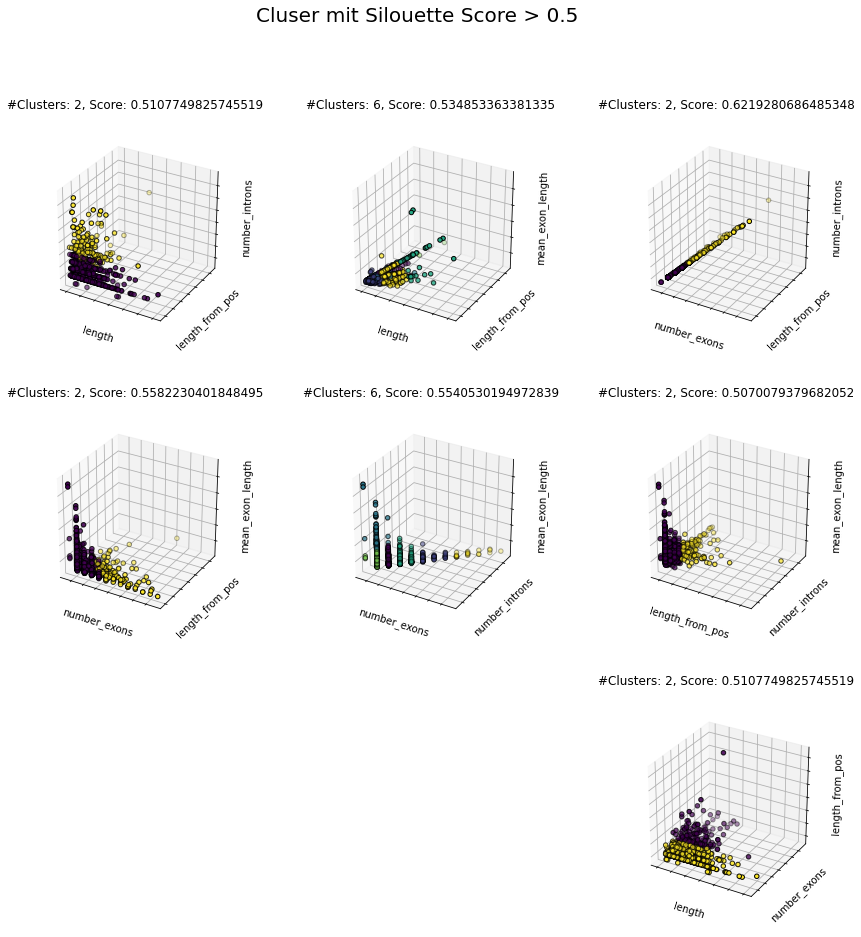

In [17]:
combinations = get_best_combinations(3, 0.5)
plot_best_combinations(3, combinations, 0.5)